### Importing necessary library

In [52]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2


ModuleNotFoundError: No module named 'tabulate'

### Reading the cleaned data file

In [2]:
rent_df_o = pd.read_csv('../Data/canada_rent_clean.csv')

rent_df = rent_df_o.copy(deep=True)
rent_df.head(5)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,2390,0,1.0,361,Unfurnished,2025-02-23,Non-Smoking,True,True
1,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,3615,1,1.0,525,Unfurnished,2025-02-23,Non-Smoking,True,True
2,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,4520,2,1.0,810,Unfurnished,2025-02-23,Non-Smoking,True,True
3,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,1930,0,1.0,265,Unfurnished,2025-02-23,Non-Smoking,True,True
4,Airdrie,Alberta,51.285251,-114.010128,Long Term,Main Floor,1700,2,1.0,997,Unfurnished,2025-02-23,Non-Smoking,False,False


In [3]:
rent_df[rent_df.isna()].sum()

city                   0
province               0
latitude             0.0
longitude            0.0
lease_term             0
type                   0
price                0.0
beds                 0.0
baths                0.0
sq_feet              0.0
furnishing             0
availability_date      0
smoking                0
cats                   0
dogs                   0
dtype: object

### Removing unrepresented population type 
---
As we have seen previously in the Data_Analysis.ipynb, not all province are represented equally in the sample dataset.
A certain amount of data is need to be representative of a population. 

---
I will be building my model and testing all my subsequent models on only these four province.
- Alberta
- Ontario
- Quebec
- British Columbia

In [4]:
# province2keep = [ 'Alberta'] #, 'Ontario', 'Quebec', 'British Columbia']

# rent_df = rent_df_or[rent_df_or['province'].isin(province2keep)]

# rent_df['province'].unique()

# rent_df
prov = rent_df['province'].unique()

In [5]:
rent_df[rent_df.isna()].sum()

city                   0
province               0
latitude             0.0
longitude            0.0
lease_term             0
type                   0
price                0.0
beds                 0.0
baths                0.0
sq_feet              0.0
furnishing             0
availability_date      0
smoking                0
cats                   0
dogs                   0
dtype: object

### Removing unecessary columns
---
As we have seen previously in the Cleaning_Data.ipynb, we well not be working with city name, since it would create tons of encoded columns. For simplicity, we will be working with latitude and longitude.

So, I will be removing the city column at this point.

---

I also will be removing the availability_date column, since I don't believe that this can affect the price.

In [6]:
rent_df = rent_df.drop(columns = ['availability_date', 'city'])

rent_df

,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
0,Alberta,51.271725,-114.020135,Negotiable,Apartment,2390,0,1.0,361,Unfurnished,Non-Smoking,True,True
1,Alberta,51.271725,-114.020135,Negotiable,Apartment,3615,1,1.0,525,Unfurnished,Non-Smoking,True,True
2,Alberta,51.271725,-114.020135,Negotiable,Apartment,4520,2,1.0,810,Unfurnished,Non-Smoking,True,True
3,Alberta,51.271725,-114.020135,Negotiable,Apartment,1930,0,1.0,265,Unfurnished,Non-Smoking,True,True
4,Alberta,51.285251,-114.010128,Long Term,Main Floor,1700,2,1.0,997,Unfurnished,Non-Smoking,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22355,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,920,0,1.0,400,Unfurnished,Non-Smoking,True,True
22356,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,1450,3,1.0,810,Unfurnished,Non-Smoking,True,True
22357,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,1125,1,1.0,520,Unfurnished,Non-Smoking,True,True
22358,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,920,0,1.0,400,Unfurnished,Non-Smoking,True,True


### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are five category columns. I believe from the five categorical column 4 are nominal.
  * lease_term
  * type
  * furnishing
  * smoking

In [7]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(rent_df[['lease_term', 'type',
                                              'furnishing', 'smoking','province']])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['lease_term', 
                                                                             'type',
                                                                             'furnishing',
                                                                             'smoking',
                                                                             'province']))


# Removing categorical columns
rent_df = rent_df.drop(columns=['lease_term', 'type',
                                'furnishing', 'smoking', 'province'])

# Join encoded dataframe to the rent_df dataframe
rent_df = rent_df.join(tmp_df)

rent_df.head()

,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,lease_term_6 months,lease_term_Long Term,...,furnishing_Unfurnished,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
0,51.271725,-114.020135,2390,0,1.0,361,True,True,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.271725,-114.020135,3615,1,1.0,525,True,True,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.271725,-114.020135,4520,2,1.0,810,True,True,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.271725,-114.020135,1930,0,1.0,265,True,True,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.285251,-114.010128,1700,2,1.0,997,False,False,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
tmp_df[tmp_df.isna()].sum()

lease_term_6 months                   0.0
lease_term_Long Term                  0.0
lease_term_Negotiable                 0.0
lease_term_Short Term                 0.0
lease_term_months                     0.0
type_Basement                         0.0
type_Condo Unit                       0.0
type_Duplex                           0.0
type_House                            0.0
type_Loft                             0.0
type_Main Floor                       0.0
type_Mobile                           0.0
type_Room For Rent                    0.0
furnishing_Negotiable                 0.0
furnishing_Unfurnished                0.0
smoking_Smoking Allowed               0.0
province_British Columbia             0.0
province_Manitoba                     0.0
province_New Brunswick                0.0
province_Newfoundland and Labrador    0.0
province_Nova Scotia                  0.0
province_Ontario                      0.0
province_Quebec                       0.0
province_Saskatchewan             

In [9]:
tmp_df.dropna(axis=1)

,lease_term_6 months,lease_term_Long Term,lease_term_Negotiable,lease_term_Short Term,lease_term_months,type_Basement,type_Condo Unit,type_Duplex,type_House,type_Loft,...,furnishing_Unfurnished,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22355,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22356,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22358,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Removing categorical columns that are not available in each province
---
In order for an independent variable to be used as a predictor it must be avaialble in every sample population

In [10]:
rent_df[rent_df.isna()].sum()
#rent_df = rent_df.dropna(axis=1)

latitude                              0.0
longitude                             0.0
price                                 0.0
beds                                  0.0
baths                                 0.0
sq_feet                               0.0
cats                                    0
dogs                                    0
lease_term_6 months                   0.0
lease_term_Long Term                  0.0
lease_term_Negotiable                 0.0
lease_term_Short Term                 0.0
lease_term_months                     0.0
type_Basement                         0.0
type_Condo Unit                       0.0
type_Duplex                           0.0
type_House                            0.0
type_Loft                             0.0
type_Main Floor                       0.0
type_Mobile                           0.0
type_Room For Rent                    0.0
furnishing_Negotiable                 0.0
furnishing_Unfurnished                0.0
smoking_Smoking Allowed           

### Encoding ordinal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are five categorical columns. I believe that the province can be classified as an ordinal categorical columns based on the amount of adds there are in the dataset for each province.

1- Alberta
2- Ontario
3- Quebec
4- British Columbia  
     ... and so on

     

In [11]:
# count = rent_df.groupby(['province'])['beds'].count().sort_values(ascending=False)

# rank = {province: rank for rank, province in enumerate(count.index, start=1)}

# rent_df["province_numeric"] = rent_df["province"].map(rank)

# tmp_df = rent_df.copy()
# rent_df = rent_df.drop(columns='province')

# rent_df.head(5)

### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**


Conclusion : 
- Latitude and Longitude are highly co-correlated.
- Dogs and cats are highly co-correlated
- Lease term negociable and long term are highly co-correlated


- Beds and Baths are moderately co-correlated

There is no independent feature that is a unremarkably well correlated to price.
Beds and baths are moderately correlated to price.
The next features that are better correlayed to price but low correlation (not near 0) are : type_house, latitude, longitude, type_basement, sq_feet


In [12]:
rent_df.sum()

latitude                              1.088322e+06
longitude                            -2.220955e+06
price                                 4.891189e+07
beds                                  3.831100e+04
baths                                 3.086450e+04
sq_feet                               2.068890e+07
cats                                  1.450400e+04
dogs                                  1.386800e+04
lease_term_6 months                   2.000000e+00
lease_term_Long Term                  2.069200e+04
lease_term_Negotiable                 1.285000e+03
lease_term_Short Term                 3.090000e+02
lease_term_months                     2.000000e+00
type_Basement                         1.655000e+03
type_Condo Unit                       2.251000e+03
type_Duplex                           4.880000e+02
type_House                            1.587000e+03
type_Loft                             2.200000e+01
type_Main Floor                       8.100000e+02
type_Mobile                    

In [13]:
# Compute correlation
corr = rent_df.select_dtypes(include=[float, int, bool]).corr()

In [14]:
corr

,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,lease_term_6 months,lease_term_Long Term,...,furnishing_Unfurnished,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
latitude,1.000000,-0.894806,-0.240375,0.199964,0.170524,0.068300,-0.237015,-0.236912,0.007160,-0.201472,...,-0.191452,0.042271,0.040190,0.064217,-0.014273,-0.006114,-0.112126,-0.808515,-0.287227,0.125144
longitude,-0.894806,1.000000,0.137468,-0.206781,-0.185345,-0.072842,0.261586,0.235655,-0.009972,0.209195,...,0.194940,-0.034271,-0.291736,0.022441,0.038009,0.051311,0.197579,0.695307,0.466534,-0.057215
price,-0.240375,0.137468,1.000000,0.410193,0.485465,0.108228,0.064032,0.107975,0.007354,-0.023510,...,-0.010910,-0.037558,0.084660,-0.089469,-0.010014,-0.022230,0.041914,0.203836,-0.015368,-0.141399
beds,0.199964,-0.206781,0.410193,1.000000,0.679201,0.257100,-0.151554,-0.108110,0.002805,-0.074857,...,-0.045114,0.019325,-0.061763,-0.029572,-0.003276,-0.003276,-0.012752,-0.156571,-0.097053,-0.044941
baths,0.170524,-0.185345,0.485465,0.679201,1.000000,0.213226,-0.123184,-0.075627,0.013054,-0.064723,...,-0.069927,-0.001389,-0.029333,-0.019252,-0.005036,-0.012113,-0.000766,-0.131745,-0.097457,-0.079071
sq_feet,0.068300,-0.072842,0.108228,0.257100,0.213226,1.000000,-0.078181,-0.065906,0.001994,-0.079558,...,-0.048690,0.001763,-0.022488,-0.014441,0.000296,-0.003734,-0.001045,-0.060274,-0.027089,-0.021954
cats,-0.237015,0.261586,0.064032,-0.151554,-0.123184,-0.078181,1.000000,0.841285,-0.002945,0.211424,...,0.284534,0.009743,0.059982,0.072312,-0.017925,-0.003913,0.044164,0.202153,0.095968,0.092633
dogs,-0.236912,0.235655,0.107975,-0.108110,-0.075627,-0.065906,0.841285,1.000000,-0.002343,0.196234,...,0.264814,-0.043454,0.062106,0.031278,-0.016455,-0.002673,-0.046670,0.239220,0.058751,0.079466
lease_term_6 months,0.007160,-0.009972,0.007354,0.002805,0.013054,0.001994,-0.002945,-0.002343,1.000000,-0.033312,...,-0.012124,-0.000956,0.019714,-0.001805,-0.000190,-0.000190,-0.000954,-0.005851,-0.003128,-0.001495
lease_term_Long Term,-0.201472,0.209195,-0.023510,-0.074857,-0.064723,-0.079558,0.211424,0.196234,-0.033312,1.000000,...,0.432028,-0.056397,0.038610,0.048647,0.005697,0.005697,0.016687,0.166515,0.080752,0.041565


In [15]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(corr['price']).sort_values(by='price', ascending=False)

,price
price,1.000000
baths,0.485465
beds,0.410193
type_House,0.289548
province_Ontario,0.203836
longitude,0.137468
sq_feet,0.108228
dogs,0.107975
lease_term_Short Term,0.093831
province_British Columbia,0.084660


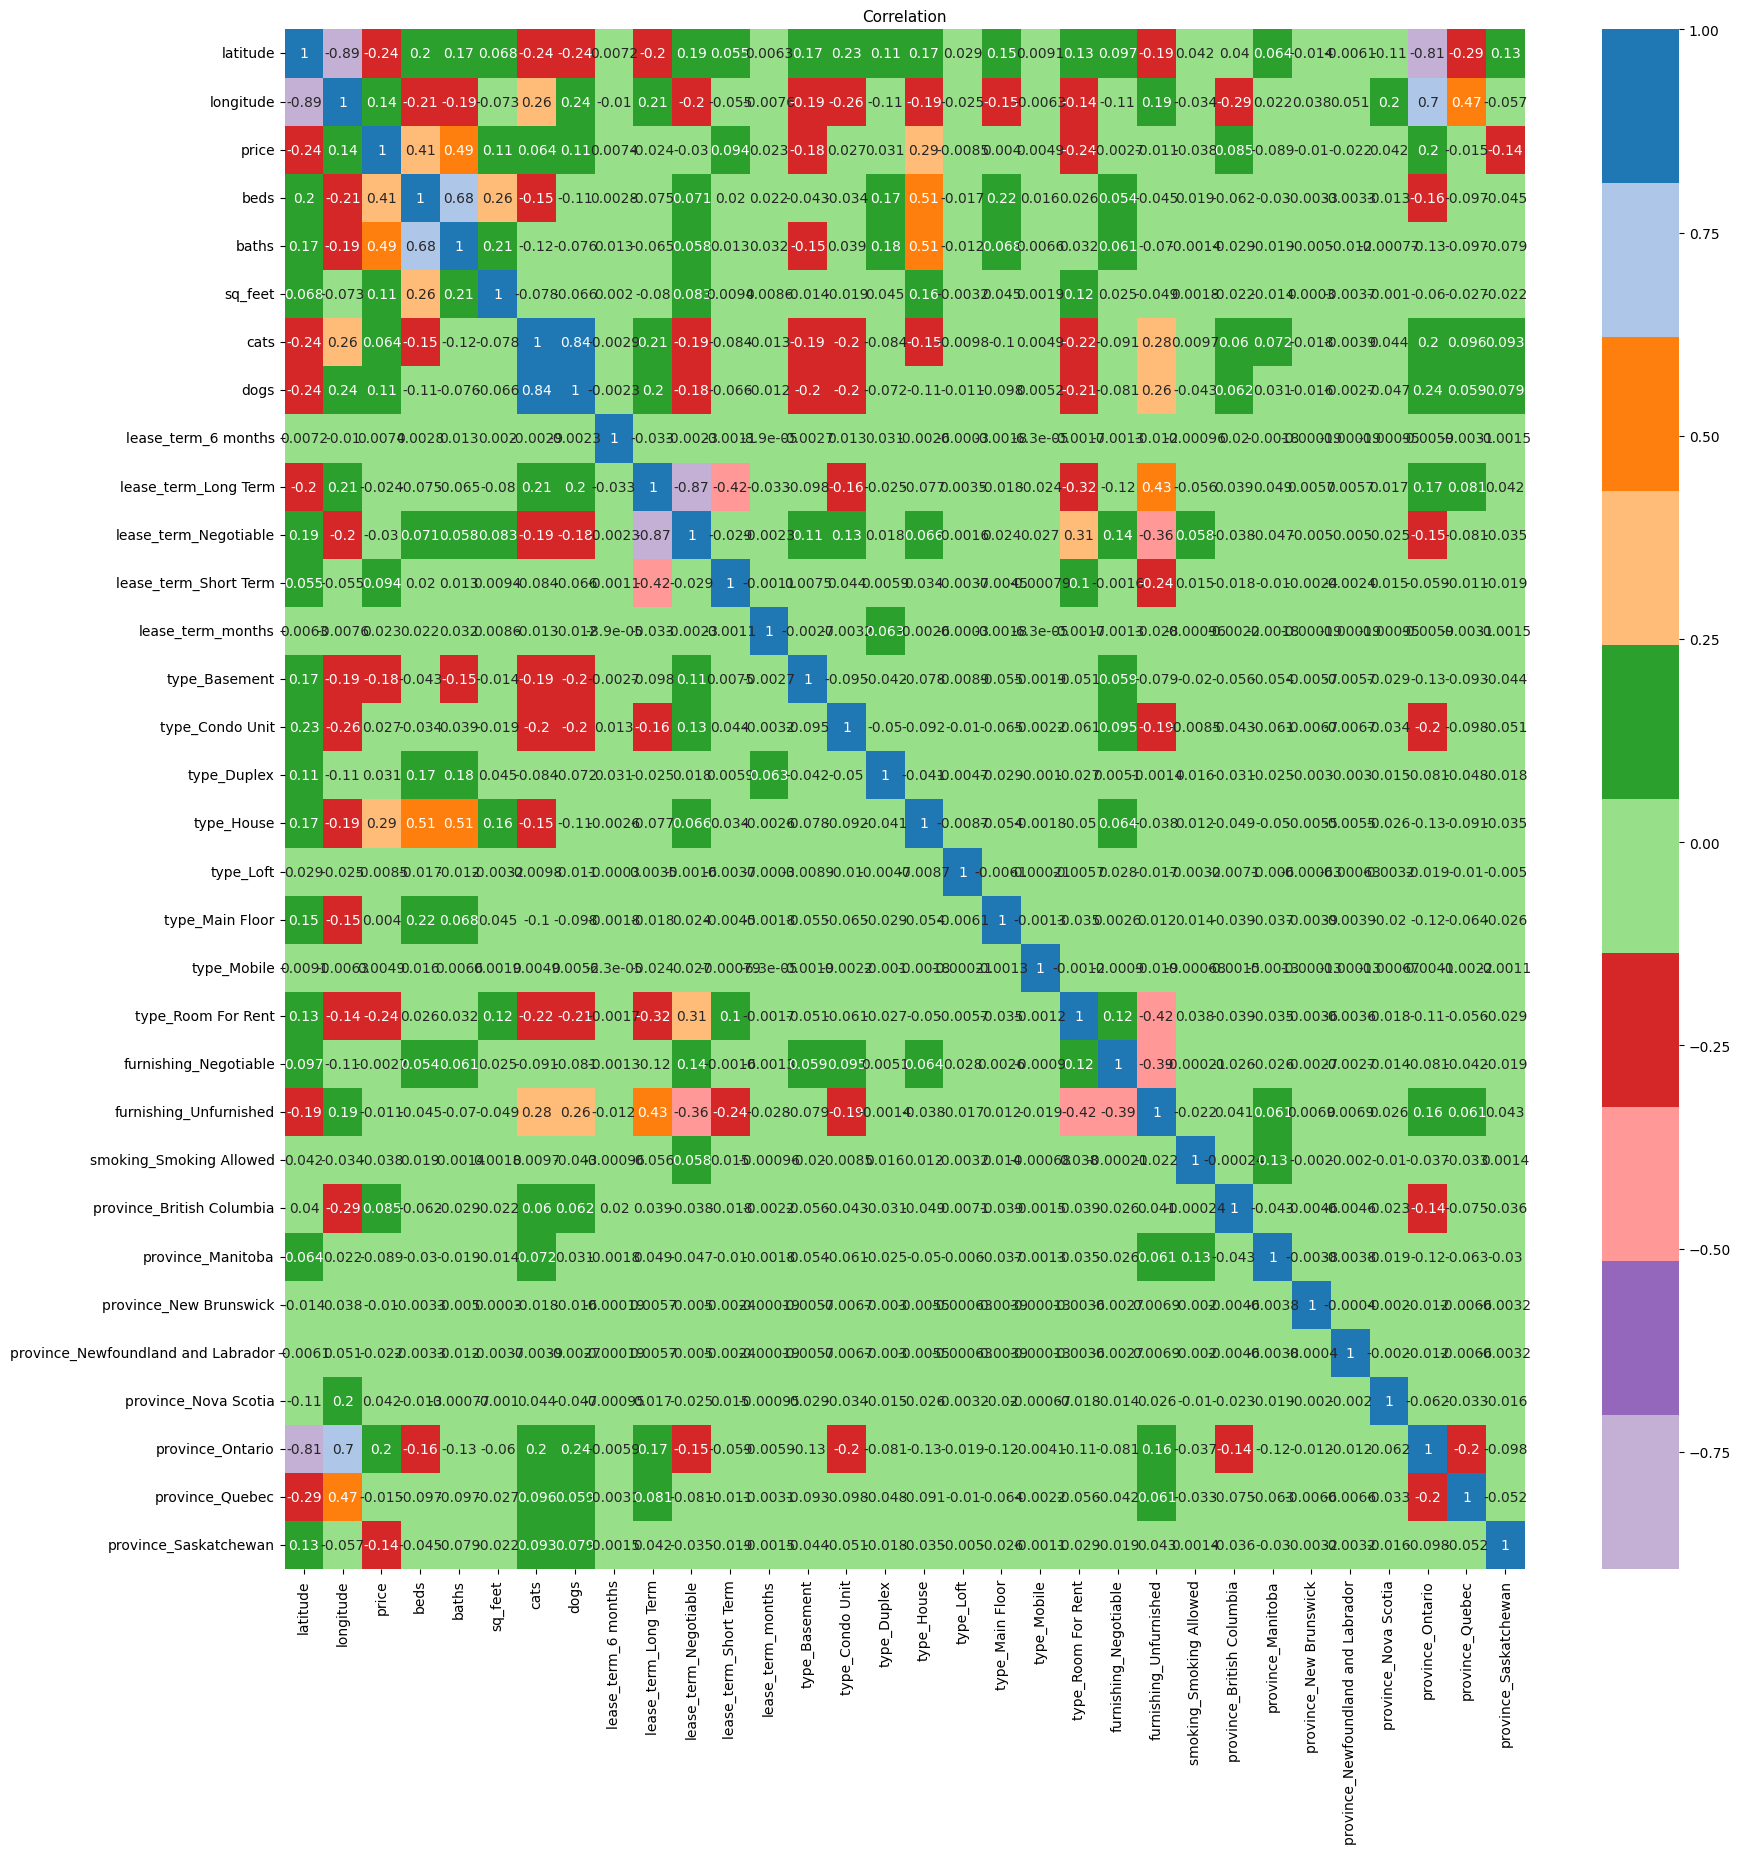

In [16]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../Graph/Correlation_heatmap.png')

# Show plot
plt.show()

### Splitting the dataset into training vs testing dataset

In [17]:
# Need to turn longitude to positive to used SelectKBest
# We are only considering Canada. So, all longitude are negative.
# There is no positive values on our dataset.
rent_df['longitude'] = abs(rent_df['longitude'])

In [18]:
rent_df = rent_df.reset_index(drop=True)

In [19]:
# Separate independent variable from dependent variable
X = rent_df.drop(['price'], axis=1)
y = rent_df['price']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Save the data
X_train.to_csv('../Data/X_Training_Can.csv', index=False)
X_test.to_csv('../Data/X_Testing_Can.csv', index=False)
y_train.to_csv('../Data/y_Training_Can.csv', index=False)
y_test.to_csv('../Data/y_Testing_Can.csv', index=False)


In [20]:
y_train[y_train.isna()].sum()

np.int64(0)

In [21]:
X_train[X_train.isna()].sum()
print(np.isinf(X_train).sum())  
print(X_train.dtypes)
print(X_train.applymap(lambda x: isinstance(x, str)).sum()) 
print(X_train.isna().sum().sum())
print(X_train[X_train.isnull()].count())

latitude                              0
longitude                             0
beds                                  0
baths                                 0
sq_feet                               0
cats                                  0
dogs                                  0
lease_term_6 months                   0
lease_term_Long Term                  0
lease_term_Negotiable                 0
lease_term_Short Term                 0
lease_term_months                     0
type_Basement                         0
type_Condo Unit                       0
type_Duplex                           0
type_House                            0
type_Loft                             0
type_Main Floor                       0
type_Mobile                           0
type_Room For Rent                    0
furnishing_Negotiable                 0
furnishing_Unfurnished                0
smoking_Smoking Allowed               0
province_British Columbia             0
province_Manitoba                     0


/tmp/ipykernel_332670/4269902708.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(lambda x: isinstance(x, str)).sum())


### Find the best independent features to predict with

In [22]:
len(X.columns)

31

In [23]:
# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 5 best independent features are :', selected_features)

The top 5 best independent features are : ['longitude' 'sq_feet' 'lease_term_6 months' 'type_Room For Rent'
 'province_Manitoba']


In [24]:
# Initialize SelectKBest with chi2, choose top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 10 features
print('The top 10 best independent features are :', selected_features)

The top 10 best independent features are : ['longitude' 'sq_feet' 'lease_term_6 months' 'type_Basement' 'type_House'
 'type_Room For Rent' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Ontario'
 'province_Saskatchewan']


In [25]:
# Initialize SelectKBest with chi2, choose top 15 features
selector = SelectKBest(score_func=chi2, k=15)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 15 best independent features are :', selected_features)

The top 15 best independent features are : ['longitude' 'beds' 'sq_feet' 'lease_term_6 months'
 'lease_term_Negotiable' 'lease_term_Short Term' 'type_Basement'
 'type_House' 'type_Room For Rent' 'province_British Columbia'
 'province_Manitoba' 'province_Newfoundland and Labrador'
 'province_Ontario' 'province_Quebec' 'province_Saskatchewan']


In [26]:
# Initialize SelectKBest with chi2, choose top 20 features
selector = SelectKBest(score_func=chi2, k=20)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 20 features
print('The top 20 best independent features are :', selected_features)

The top 20 best independent features are : ['latitude' 'longitude' 'beds' 'baths' 'sq_feet' 'lease_term_6 months'
 'lease_term_Negotiable' 'lease_term_Short Term' 'type_Basement'
 'type_Condo Unit' 'type_House' 'type_Room For Rent'
 'smoking_Smoking Allowed' 'province_British Columbia' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Nova Scotia'
 'province_Ontario' 'province_Quebec' 'province_Saskatchewan']


## By province

In [39]:
prov = 'Alberta'

In [40]:
prov_df = rent_df_o[rent_df_o['province'] == prov]

In [41]:
prov_df = prov_df.drop(columns = ['availability_date','province'])



In [42]:
prov_df.isna().sum()

city          0
latitude      0
longitude     0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [43]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(prov_df[['lease_term', 'type',
                                              'furnishing', 'smoking','city']])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['lease_term', 
                                                                             'type',
                                                                             'furnishing',
                                                                             'smoking','city']))


# Removing categorical columns
prov_df = prov_df.drop(columns=['lease_term', 'type',
                                'furnishing', 'smoking','city'])

prov_df = prov_df.reset_index(drop=True)
tmp_df = tmp_df.reset_index(drop=True)


# Join encoded dataframe to the rent_df dataframe
prov_df = prov_df.join(tmp_df)

prov_df['longitude'] = abs(prov_df['longitude'])
prov_df.head()

,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,lease_term_6 months,lease_term_Long Term,...,city_St. Albert,city_Stony Plain,city_Strathmore,city_Sundre,city_Sylvan Lake,city_Wainwright,city_Westerose,city_Westlock,city_Wetaskiwin,city_Whitecourt
0,51.271725,114.020135,2390,0,1.0,361,True,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.271725,114.020135,3615,1,1.0,525,True,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.271725,114.020135,4520,2,1.0,810,True,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.271725,114.020135,1930,0,1.0,265,True,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.285251,114.010128,1700,2,1.0,997,False,False,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Compute correlation
corr = prov_df.select_dtypes(include=[float, int,bool]).corr()

In [53]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(corr['price']).sort_values(by='price', ascending=False)

,price
price,1.000000
baths,0.561557
beds,0.480211
type_House,0.435948
city_Calgary,0.226821
...,...
city_Medicine Hat,-0.052678
type_Basement,-0.202120
city_Edmonton,-0.203474
latitude,-0.214210


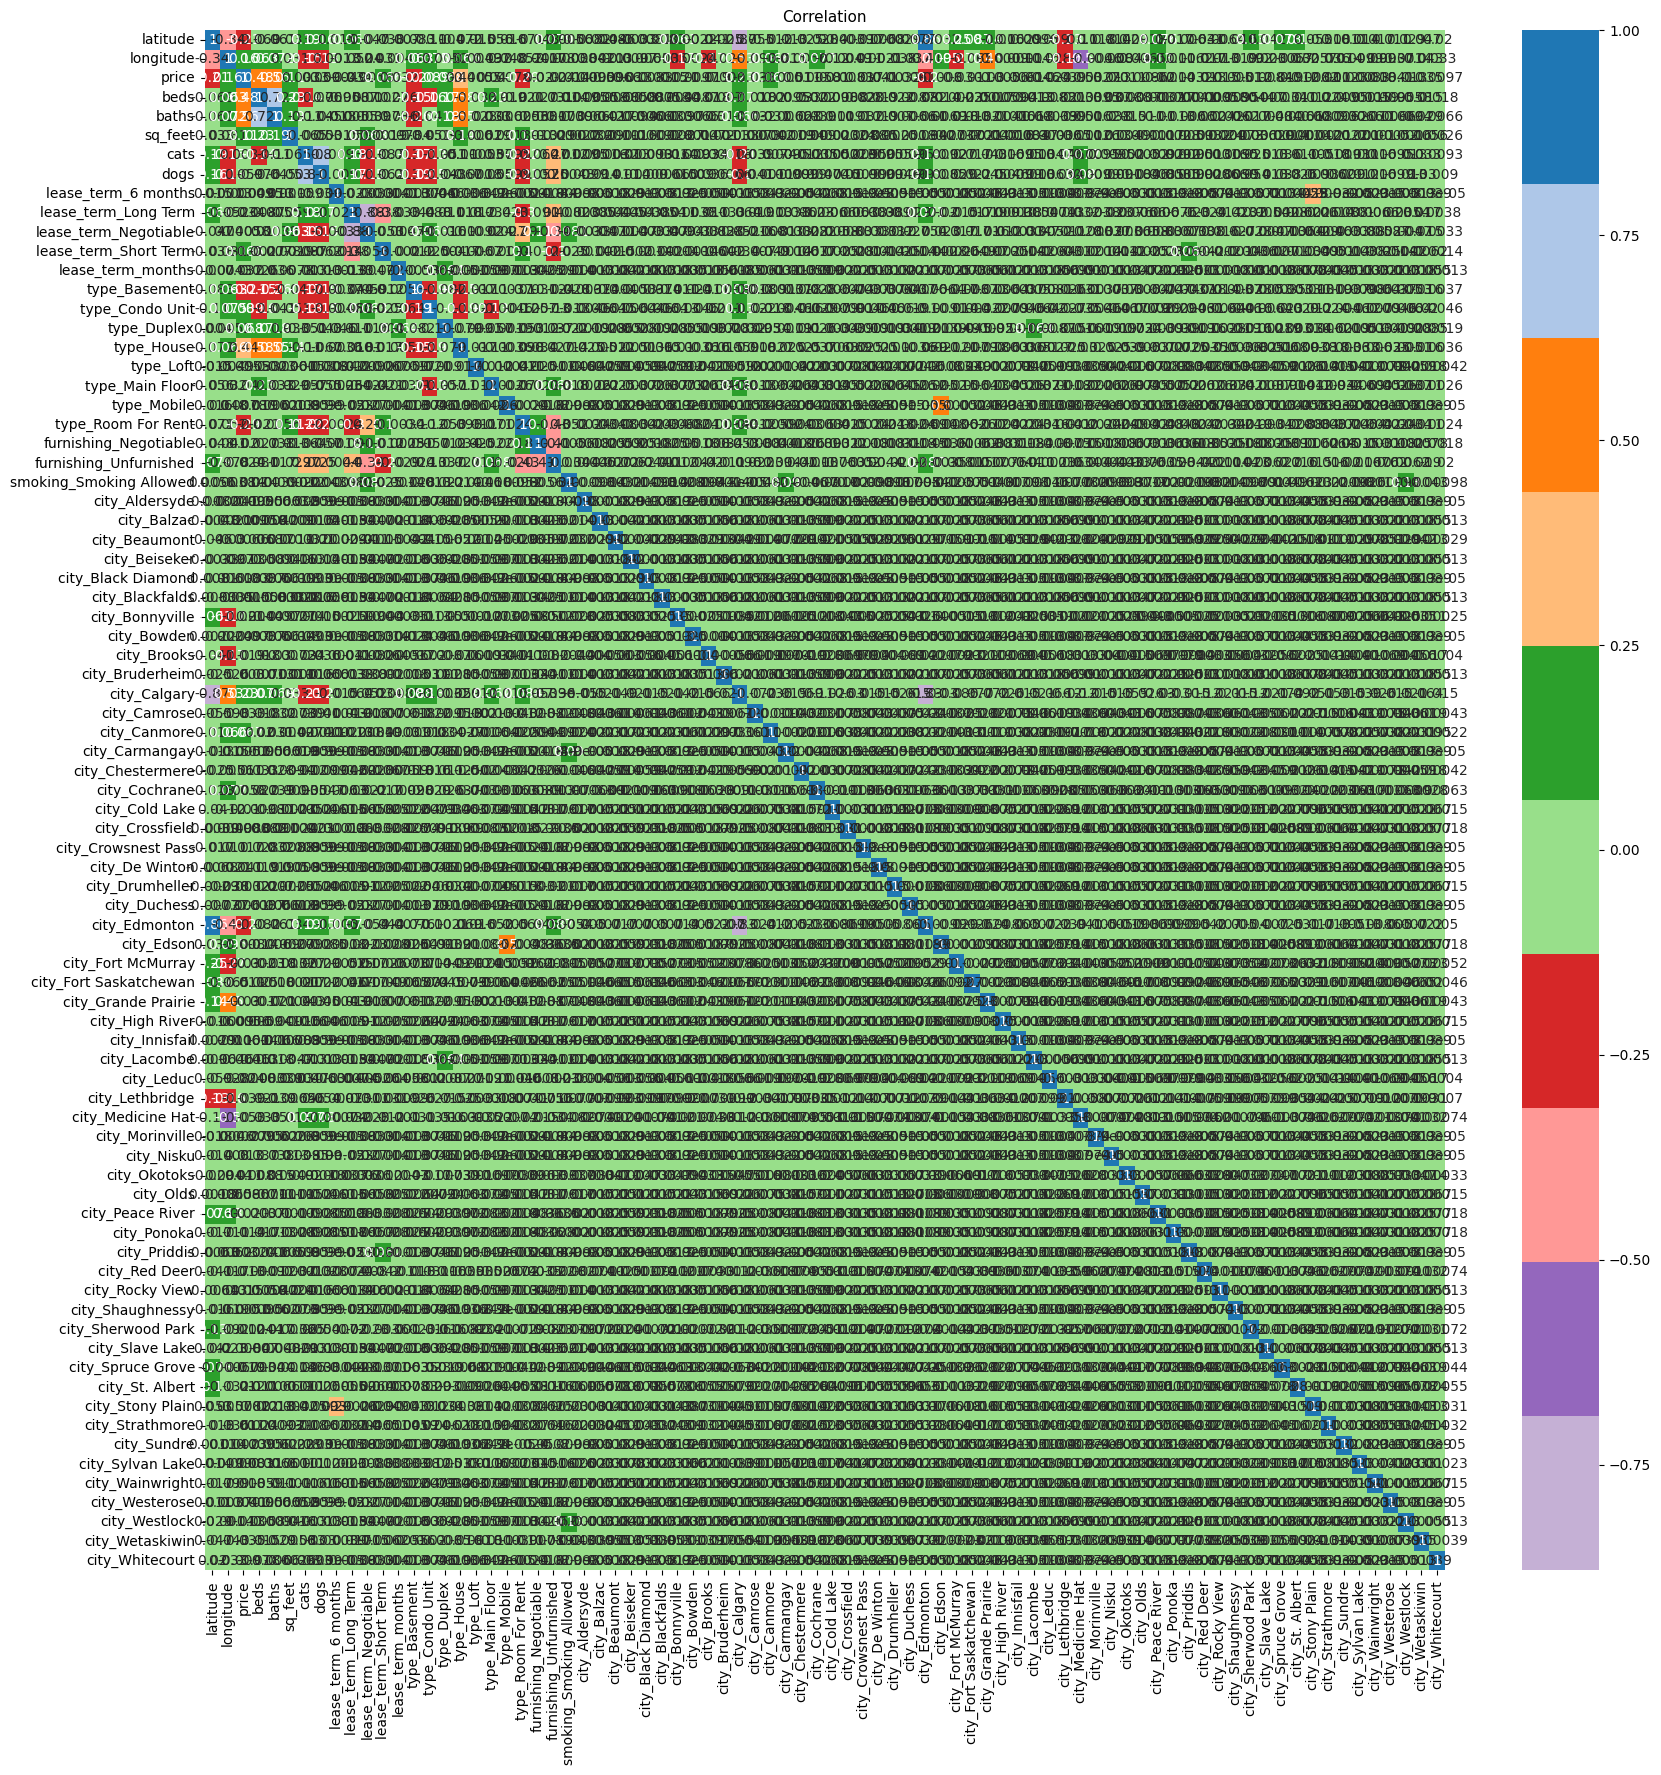

In [46]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../Graph/Correlation_heatmap.png')

# Show plot
plt.show()

In [47]:
# Separate independent variable from dependent variable
X = prov_df.drop(['price'], axis=1)
y = prov_df['price']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Save the data
X_train.to_csv(f'../Data/X_Training_{prov}.csv', index=False)
X_test.to_csv(f'../Data/X_Testing_{prov}.csv', index=False)
y_train.to_csv(f'../Data/y_Training_{prov}.csv', index=False)
y_test.to_csv(f'../Data/y_Testing_{prov}.csv', index=False)

In [48]:
# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 5 best independent features are :', selected_features)

The top 5 best independent features are : ['sq_feet' 'type_House' 'type_Room For Rent' 'city_Camrose'
 'city_Medicine Hat']


In [49]:
# Initialize SelectKBest with chi2, choose top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 10 best independent features are :', selected_features)

The top 10 best independent features are : ['sq_feet' 'type_Basement' 'type_House' 'type_Room For Rent'
 'city_Bonnyville' 'city_Camrose' 'city_Grande Prairie' 'city_Lethbridge'
 'city_Medicine Hat' 'city_Sylvan Lake']


In [50]:
# Initialize SelectKBest with chi2, choose top 15 features
selector = SelectKBest(score_func=chi2, k=15)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 15 best independent features are :', selected_features)

The top 15 best independent features are : ['beds' 'sq_feet' 'type_Basement' 'type_House' 'type_Room For Rent'
 'city_Blackfalds' 'city_Bonnyville' 'city_Camrose' 'city_Edmonton'
 'city_Grande Prairie' 'city_Lethbridge' 'city_Medicine Hat'
 'city_Sherwood Park' 'city_St. Albert' 'city_Sylvan Lake']
